## Dataset
**MNIST data** is a collection of 28x28 grayscale images; hence each pixel is a gray-level from 0-255.
## Task
You will consider digit classification on MNIST data, as a simple image understanding/machine learnng
problem that is widely studied. The aim is to reverse the learning so that you are first interested in the problem
and thus will be more motivated to better learn about the possible approaches to the problem.

### Importing Data from local

In [1]:
from mlxtend.data import loadlocal_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.utils import shuffle
import math
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

#Imporating the Mnist Data that is downloaded from orginal source
# i.e. http://yann.lecun.com/exdb/mnist/

# trainingImages, and trainingLabels
xTrain, yTrain = loadlocal_mnist(
        images_path='train-images-idx3-ubyte', 
        labels_path='train-labels-idx1-ubyte')

# testImages, and testLabels 
xTest, yTest = loadlocal_mnist(
        images_path='t10k-images-idx3-ubyte', 
        labels_path='t10k-labels-idx1-ubyte')


In [2]:
print("xTrain initial shape: ", xTrain.shape)
print("yTrain initial shape: ", yTrain.shape)
print("xTest initial shape:  ", xTest.shape)
print("yTest initial shape:  ", yTest.shape)

xTrain initial shape:  (60000, 784)
yTrain initial shape:  (60000,)
xTest initial shape:   (10000, 784)
yTest initial shape:   (10000,)


### Checking few examples from train data

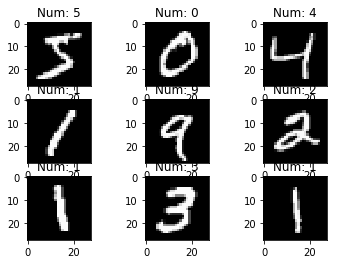

In [3]:
# inorder to view xTrain
x_train = xTrain.reshape(60000, 28, 28)
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xTrain[i].reshape([28,28]), cmap='gray', interpolation='none')
    plt.title("Num: {}".format(yTrain[i]))

### Formating Training Data

In [4]:
# take 15% of the training data and use that for validation
# Taking first 15K as the to lower the calculation time
(trainData, valData, trainLabels, valLabels) = train_test_split(xTrain[:15000], yTrain[:15000], test_size=0.15, random_state=84)

### Creating Decision Tree Classifier

In [5]:
clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=128, max_features=784)
clf = clf.fit(xTrain[:15000], yTrain[:15000])

In [6]:
predictionRes = clf.predict(xTest)

In [7]:
report = metrics.classification_report(yTest.tolist(), predictionRes, digits=4)

In [8]:
print(report)

              precision    recall  f1-score   support

           0     0.8792    0.9133    0.8959       980
           1     0.9255    0.9419    0.9336      1135
           2     0.8160    0.7994    0.8076      1032
           3     0.7948    0.7901    0.7925      1010
           4     0.7976    0.8065    0.8020       982
           5     0.7838    0.7679    0.7758       892
           6     0.8546    0.8528    0.8537       958
           7     0.8790    0.8765    0.8777      1028
           8     0.7232    0.7053    0.7141       974
           9     0.8057    0.8097    0.8077      1009

   micro avg     0.8286    0.8286    0.8286     10000
   macro avg     0.8259    0.8263    0.8261     10000
weighted avg     0.8279    0.8286    0.8282     10000



In [9]:
accuracy = 100.0 * metrics.accuracy_score(yTest, predictionRes)

In [10]:
print(accuracy)

82.86


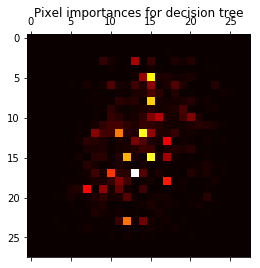

In [11]:
# Pixel importances on 28*28 image
importances = clf.feature_importances_
importances = importances.reshape((28, 28))

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances for decision tree")
plt.show()

###  K-Nearest Neighbor Classification

#### Initialize the values of k for our k-NN classifier along with the list of accuracies for each value of k

In [12]:
kValues = range(1, 19, 2)

accuracyKvalues = []

for k in kValues:
    # train the classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(trainData, trainLabels)

    # evaluate the model and print the accuracies list
    score = model.score(valData, valLabels)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracyKvalues.append(score)

k=1, accuracy=95.78%
k=3, accuracy=95.38%
k=5, accuracy=95.20%
k=7, accuracy=95.02%
k=9, accuracy=95.02%
k=11, accuracy=94.40%
k=13, accuracy=94.13%
k=15, accuracy=94.04%
k=17, accuracy=94.04%


In [13]:
# largest accuracy
# np.argmax returns the indices of the maximum values along an axis
i = np.argmax(accuracyKvalues)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (accuracyKvalues[i],
    accuracies[i] * 100))


NameError: name 'kVals' is not defined

#### Trying it on testing data with k value that gave highest accuracy

In [ ]:
# Now that I know the best value of k, re-train the classifier
model = KNeighborsClassifier(n_neighbors=kValues[i])
model.fit(trainData, trainLabels)

# Predict labels for the test set
predictions = model.predict(testData)

# Evaluate performance of model for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))